# Sprungtemperatur und Hall-Widerstand

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.constants as c
from scipy.signal import savgol_filter, find_peaks

Sprungtemperatur:

In [2]:
T_sprung, I_sprung, Omega_sprung = np.genfromtxt('data/widerstand_spule',skip_header=21,usecols=(1,6,7)).T

[7.462 7.462 7.462 7.462 7.462 7.462 6.934 6.934 6.934 6.934 6.934 6.36
 6.36  6.36  6.36  6.36  5.75  5.75  5.75  5.75  5.75  5.188 5.188 5.188
 5.188 5.188 5.188 4.778 4.778 4.778 4.778 4.778 4.515 4.515 4.515 4.515
 4.515 4.358 4.358 4.358 4.358 4.358 4.268 4.268 4.268 4.268 4.268 4.268
 4.213 4.213 4.213 4.213 4.213 4.173 4.173 4.173 4.173 4.173 4.143 4.143
 4.143 4.143 4.143]
[22.75179  22.18848  21.98811  21.99824  21.87587  21.76694  21.82344
 21.61188  21.5384   21.52178  21.60689  21.95688  22.18928  22.50976
 22.52964  22.6717   22.47006  22.73231  22.88731  22.93915  23.04688
 22.67967  20.59844  16.00438   9.450829  3.716256  2.031702  1.787282
  1.596299  1.278623  1.156807  1.084019  1.242588  1.27125   2.016897
  2.235074  2.264201  2.26647   2.593748  2.630887  2.69107   2.562135
  2.05993   1.705197  1.860164  1.937513  1.184176  1.236073  1.242681
  1.732563  2.249681  2.463011  2.352095  2.405094  2.642674  2.705244
  2.134045  1.942869  1.865707  1.564711  1.238135 

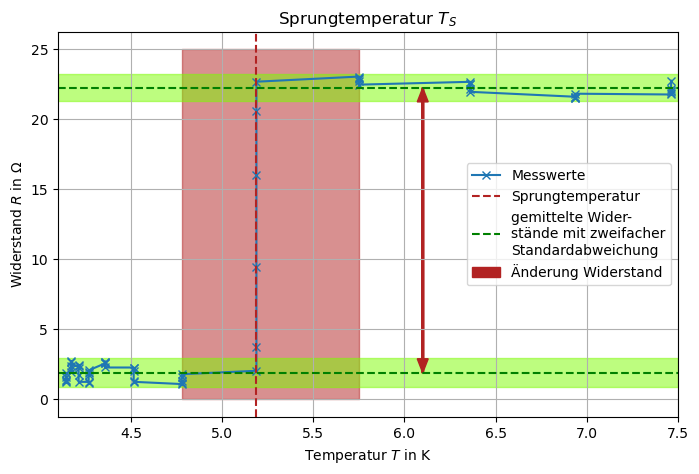

In [3]:
cut = 3317
cut2 = 3380
T_cut = T_sprung[cut:cut2]
I_cut = I_sprung[cut:cut2]
Omega_cut = Omega_sprung[cut:cut2]

print(T_cut)
print(Omega_cut)

# Bestimmung Sprungtemperatur
# Immer sechs Werte auf selbe Temperatur gespeichert --> Wähle diese Kante als Sprungtemperatur
# Fehler abgechätzt als Abstand zu benachbarten sechs Werten

index_s=21
T_s = T_cut[index_s]
T_s_error = abs(T_cut[index_s]-T_cut[index_s-1])

w_high = np.mean(Omega_cut[:index_s+1])
w_high_error = 2*np.std(Omega_cut[:index_s+1])
w_low = np.mean(Omega_cut[index_s+5:])
w_low_error = 2*np.std(Omega_cut[index_s+5:])
delta_w = w_high-w_low

# händisch
# w_low = 1.8
# w_low_error = 0.9
# w_high = 22.4
# w_high_error = 1.0

print('Sprungtemperatur: ',T_s)
print('Fehler Sprungtemperatur rechts: ',T_s_error)
print('Fehler Sprungtemperatur links: ',abs(T_cut[index_s+6]-T_cut[index_s+5]))

print('Omega_low :',w_low)
print('Fehler Omega_low :',w_low_error)
print('Omega_high :',w_high)
print('Fehler Omega_high :',w_high_error)
print('Änderung Widerstand: ',delta_w)

ax = plt.subplots(figsize=(8,5))
plt.grid()
#plt.scatter(T_cut,I_cut*1.0e8,marker='x')
plt.plot(T_cut,Omega_cut,marker='x',label='Messwerte')
plt.axvline(x=T_s,linestyle='dashed',color='firebrick',label='Sprungtemperatur')
plt.fill_between([4.778,5.75],0,25,color='firebrick',alpha=.5)
plt.axhline(w_low,linestyle='dashed',color='green',label='gemittelte Wider-\nstände mit zweifacher\nStandardabweichung')
plt.fill_between([4.1,7.5],w_low-w_low_error,w_low+w_low_error,color='lawngreen',alpha=.5)
plt.axhline(w_high,linestyle='dashed',color='green')
plt.fill_between([4.1,7.5],w_high-w_high_error,w_high+w_high_error,color='lawngreen',alpha=.5)
plt.arrow(6.1,w_low,0.0,delta_w,width=0.01,length_includes_head=True,head_width=0.06,head_length=1.0,color='firebrick',label='Änderung Widerstand')
plt.arrow(6.1,w_high,0.0,-delta_w,width=0.01,length_includes_head=True,head_width=0.06,head_length=1.0,color='firebrick')
plt.title('Sprungtemperatur $T_S$')
plt.xlabel('Temperatur $T$ in K')
plt.ylabel('Widerstand $R$ in $\Omega$')
plt.xlim(4.1,7.5)
plt.legend()
plt.savefig('figures/sprungtemperatur.pdf')


Hall-Messung:

In [4]:
# Setze cut, damit nur Hinweg geplotted wird.
I_mag, B, I, Rxy, Rxx = np.genfromtxt('data/hall3',skip_header=26,usecols=(1,2,9,10,11)).T
cut=800
B = B[:cut]
Rxx = Rxx[:cut]
Rxy = Rxy[:cut]

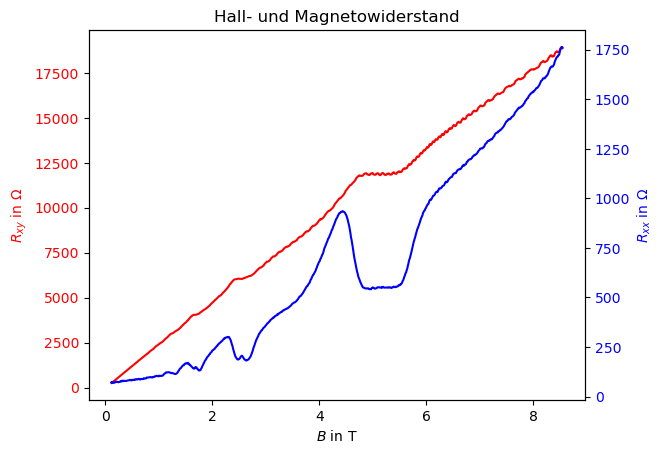

In [5]:
# Hin- und Rurücklaufen!!!, unterschiedliche Skalierungen (zwei Achens)!!!

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(B,Rxy,color='red',label=r'$R_{xy}$')
ax1.set_ylabel(r'$R_{xy}$ in $\Omega$',color='red')
ax1.tick_params(axis ='y', labelcolor = 'red')

ax2.plot(B,Rxx,color='blue',label=r'$R_{xx}$')
ax2.set_ylabel(r'$R_{xx}$ in $\Omega$',color='blue')
ax2.tick_params(axis ='y', labelcolor = 'blue')

ax1.set_xlabel(r'$B$ in T')
plt.title('Hall- und Magnetowiderstand')
plt.savefig('figures/hall_und_magneto.pdf')

In [6]:
def lin_func(x,m,b):
    return m*x+b

Steigung:  2444.0830900615983
Fehler Steigung:  2.157826940204845
Flächenladungsträgerdichte:  2553722129922947.0
Fehler Flächenladungsträgerdichte:  2254624825216.622


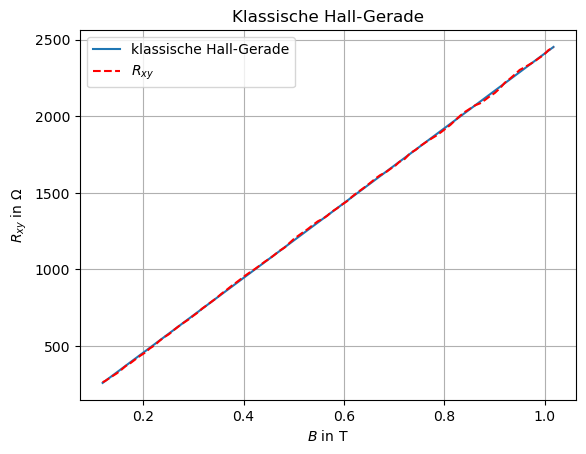

In [7]:
ax = plt.subplots()

klass = 95
B_klass = B[:klass]
Rxy_klass =  Rxy[:klass]

slope, intercept, r, p, se = linregress(B_klass, Rxy_klass)

hall_gerade = lin_func(B_klass,slope,intercept)

# Steigung ist Ableitung des Hall-Widerstandes nach B
def n_s(slope):
    return 1/c.e/slope
def n_s_error(slope,slope_std):
    return slope_std/c.e/slope/slope

print('Steigung: ',slope)
print('Fehler Steigung: ',se)
print('Flächenladungsträgerdichte: ',n_s(slope))
print('Fehler Flächenladungsträgerdichte: ',n_s_error(slope,se))

plt.plot(B_klass,hall_gerade,linestyle='solid',label='klassische Hall-Gerade')
plt.plot(B_klass,Rxy_klass,linestyle='dashed',color='red',label=r'$R_{xy}$')
plt.xlabel('$B$ in T')
plt.ylabel(r'$R_{xy}$ in $\Omega$')
plt.title('Klassische Hall-Gerade')
plt.grid()
plt.legend()
plt.savefig('figures/hall_klass.pdf')

[1, 2, 3, 4, 5, 6]
Hall-Plateau in Ohm für nu=1:  12906.403729652255
Hall-Plateau in Ohm für nu=2:  6453.201864826127
Hall-Plateau in Ohm für nu=3:  4302.134576550751
Hall-Plateau in Ohm für nu=4:  3226.6009324130637
Hall-Plateau in Ohm für nu=5:  2581.280745930451
Hall-Plateau in Ohm für nu=6:  2151.0672882753756
Hall-Plateau in Ohm für nu=7:  1843.7719613788936
plar_exp:  [11890, 6050, 4050]
err1:  [11800, 12050]
err2:  [6000, 6160]
err3:  [3980, 4120]


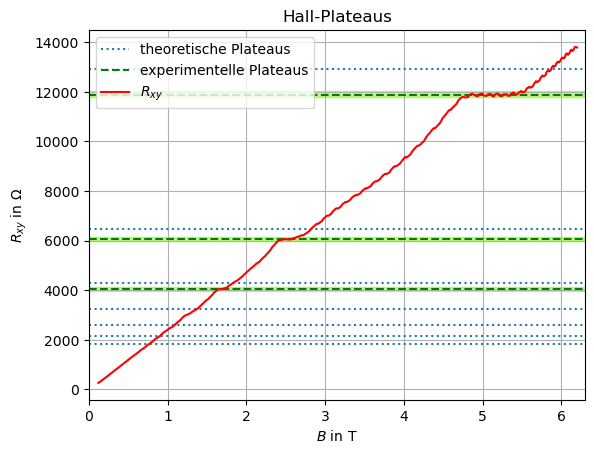

In [8]:
ax = plt.subplots()

plat = 600
B_plat = B[:plat]
Rxy_plat = Rxy[:plat]

# Theoretische Plateaus
def plat_theo(nu):
    '''Faktor 1/2 durch Spinentartung gerechtfertigt???'''
    return c.h/2/c.e/c.e/nu
plateaus = [1,2,3,4,5,6]
print(plateaus)
for nu in plateaus:
    print('Hall-Plateau in Ohm für nu='+str(nu)+': ', plat_theo(nu))
    plt.axhline(y=plat_theo(nu),linestyle='dotted')
print('Hall-Plateau in Ohm für nu='+str(7)+': ', plat_theo(7))
plt.axhline(y=plat_theo(7),linestyle='dotted',label='theoretische Plateaus')

# Spin-Entartung sollte eigentlich nicht dominieren... Hmm...
plat_exp = [11890,6050,4050]
err1 = [11800,12050]
err2 = [6000,6160]
err3 = [3980,4120]
print('plar_exp: ',plat_exp)
print('err1: ',err1)
print('err2: ',err2)
print('err3: ',err3)

plt.hlines(plat_exp,xmin=0.0,xmax=6.3,linestyle='dashed',color='green',label='experimentelle Plateaus')
plt.fill_between([0.0,6.3],err1[0],err1[1],color='lawngreen',alpha=.5)
plt.fill_between([0.0,6.3],err2[0],err2[1],color='lawngreen',alpha=.5)
plt.fill_between([0.0,6.3],err3[0],err3[1],color='lawngreen',alpha=.5)


plt.plot(B_plat,Rxy_plat,color='red',label=r'$R_{xy}$')
plt.xlabel('$B$ in T')
plt.ylabel(r'$R_{xy}$ in $\Omega$')
plt.title('Hall-Plateaus')
plt.grid()
plt.legend()
plt.xlim(0.0,6.3)
plt.savefig('figures/hall_plateaus.pdf')

[ 17  54  69 127 154 225 329 385 405 439 503 519 542 559 577 593 620 636
 658 686 703]
Minima:  [0.5915245183955252, 0.3923003985379749, 0.19263680487972143]
Fehler Minima:  [0.03152451839552517, 0.022300398537974886, 0.012636804879721436]
Differenz Minima:  [-0.19922412 -0.19966359]
Fehler Differenz Minima:  [0.05382492 0.0349372 ]
Flächenladungsträgerdichte:  [-2.42740612e+15 -2.42206323e+15]
Fehler Flächenladungsträgerdichte:  [6.55818849e+14 4.23813446e+14]


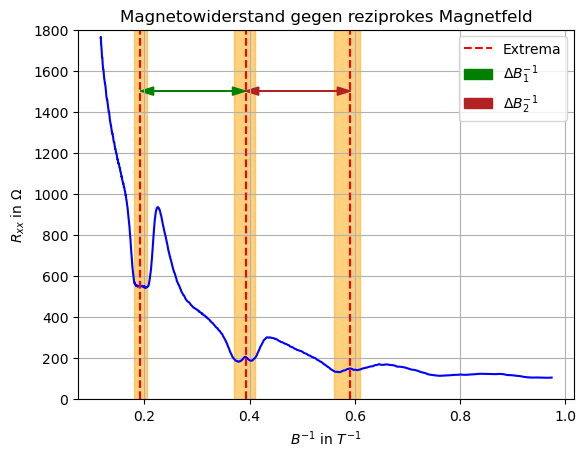

In [9]:
fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()

rezi = 95
B_rezi = 1.0/B[rezi:]
Rxx_rezi = Rxx[rezi:]

ax1.plot(B_rezi,Rxx_rezi,color='blue')
ax1.set_xlabel(r'$B^{-1}$ in $T^{-1}}$')
ax1.set_ylabel(r'$R_{xx}$ in $\Omega$')
# ax1.tick_params(axis ='y', labelcolor = 'blue')

# ax2.plot(deriv_B_rezi,deriv_Rxx_rezi,color='green')
# ax2.set_ylabel(r'$\frac{\mathrm{d}R_{xx}}{\mathrm{d}B^{-1}}$',color='green')
# ax2.tick_params(axis ='y', labelcolor = 'green')

# Finden der Extrema
extrema = find_peaks(Rxx_rezi,distance=15)[0]
print(extrema)
# händisches Auswählen der korrekten Minima
minima = [2,4,8]
extrema2 = []
for i in minima:
    extrema2.append(B_rezi[extrema[i]])

# Flächenladungsträgerdichte
def n_s_2(B_rezi_diff):
    '''Faktor 2 durch Spinentartung'''
    return 2*c.e/c.h/B_rezi_diff
def n_s_2_error(B_rezi_diff,B_rezi_diff_delta):
    return B_rezi_diff_delta*2*c.e/c.h/B_rezi_diff/B_rezi_diff

diff_B_rezi = np.diff(extrema2)
n_s_list = n_s_2(diff_B_rezi)


fehler1 = [0.56,0.61]
fehler2 = [0.37,0.41]
fehler3 = [0.18,0.205]

extrema2_error = []

extrema2_error.append(max(abs(fehler1[0]-extrema2[0]),abs(fehler1[1]-extrema2[0])))
extrema2_error.append(max(abs(fehler2[0]-extrema2[1]),abs(fehler2[1]-extrema2[1])))
extrema2_error.append(max(abs(fehler3[0]-extrema2[2]),abs(fehler3[1]-extrema2[2])))

diff_B_rezi_error = np.array([extrema2_error[0]+extrema2_error[1],extrema2_error[1]+extrema2_error[2]])
n_s_list_error = n_s_2_error(diff_B_rezi,diff_B_rezi_error)

print('Minima: ',extrema2)
print('Fehler Minima: ',extrema2_error)
print('Differenz Minima: ',diff_B_rezi)
print('Fehler Differenz Minima: ',diff_B_rezi_error)
print('Flächenladungsträgerdichte: ',n_s_list)
print('Fehler Flächenladungsträgerdichte: ',n_s_list_error)


ax1.vlines(extrema2,ymin=0,ymax=1800,linestyle='dashed',color='red',label='Extrema')
ax1.fill_between(fehler1,0,1800,color='orange',alpha=.5)
ax1.fill_between(fehler2,0,1800,color='orange',alpha=.5)
ax1.fill_between(fehler3,0,1800,color='orange',alpha=.5)

plt.arrow(extrema2[1],1500,np.diff(extrema2)[1],0.0,width=0.1,length_includes_head=True,head_width=40.0,head_length=0.025,color='green',label='$\Delta B^{-1}_1$')
plt.arrow(extrema2[2],1500,-np.diff(extrema2)[1],0.0,width=0.1,length_includes_head=True,head_width=40.0,head_length=0.025,color='green')
plt.arrow(extrema2[0],1500,np.diff(extrema2)[0],0.0,width=0.1,length_includes_head=True,head_width=40.0,head_length=0.025,color='firebrick',label='$\Delta B^{-1}_2$')
plt.arrow(extrema2[1],1500,-np.diff(extrema2)[0],0.0,width=0.1,length_includes_head=True,head_width=40.0,head_length=0.025,color='firebrick')

ax1.set_ylim(0,1800)
plt.title('Magnetowiderstand gegen reziprokes Magnetfeld')
plt.grid()
plt.legend()
plt.savefig('figures/B_reziprok.pdf')